In [1]:
# Plot Percentage Loss over Influence Index
import matplotlib.pyplot as plt
import numpy as np
from results import report

adversarial_attacks = ['to_both', 'to_src', 'to_dst', 'edge_perturb']
ignore_attacks = ['macro avg', 'Theft', 'Normal']
for graph_type, graph_type_data in report.items():
    temp = graph_type_data.copy().items()
    for window, window_data in temp:
        temp2 = window_data.copy().items()
        for attack, attack_data in temp2:
            if attack in ignore_attacks:
                del window_data[attack]


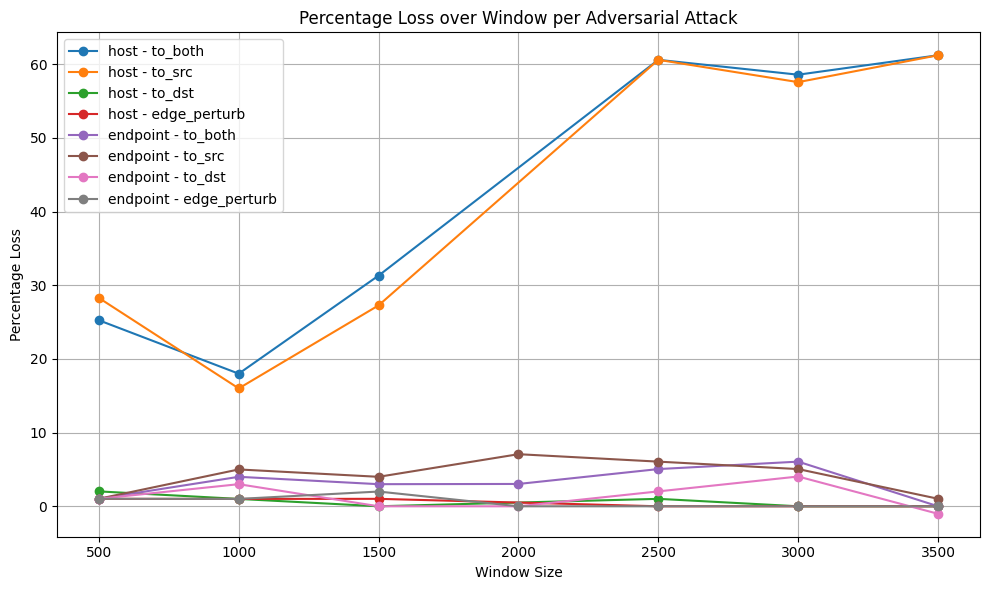

In [2]:
# Percentage Loss over Window per Adversarial Attack
def plot_percentage_loss():
    fig, ax = plt.subplots(figsize=(10, 6))
    for graph_type, graph_type_data in report.items():
        # Collect window sizes and percentage losses for each attack
        window_sizes = sorted(graph_type_data.keys())
        for adv_attack in adversarial_attacks:
            losses = []
            for window in window_sizes:
                weighted_avg = graph_type_data[window]['Weighted Average']
                normal_f1 = weighted_avg.get('normal_f1', np.nan)
                adv_f1 = weighted_avg.get(f'{adv_attack}_f1', np.nan)
                # Calculate percentage loss
                if not np.isnan(normal_f1) and not np.isnan(adv_f1) and normal_f1 != 0:
                    loss = 100 * (normal_f1 - adv_f1) / normal_f1
                else:
                    loss = np.nan
                losses.append(loss)
            ax.plot(window_sizes, losses, marker='o', label=f"{graph_type} - {adv_attack}")

    ax.set_xlabel('Window Size')
    ax.set_ylabel('Percentage Loss')
    ax.set_title('Percentage Loss over Window per Adversarial Attack')
    ax.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_percentage_loss()